In [23]:
# 데이터 프레임
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 회귀 예측 모델
from statsmodels.api import Logit

# 사이킷런
## 데이터 정제
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

## 분류 모델
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
### 분류-TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## 그리드 서치
from sklearn.model_selection import GridSearchCV

## 평가
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 
from subprocess import call

# 경고메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 폰트 설정
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus=False)

In [25]:
df_raw = pd.read_csv("../../cvs_data/cvs_weather.csv", encoding='cp949')
df_raw

,AreaId,Area,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax
0,108,서울,2020-01-01,-2.2,-6.5,1.0,0.3,1457,9.83,0.1,64.4,0.0,NaN
1,108,서울,2020-01-02,1.0,-0.7,1.0,3.8,1500,NaN,0.0,65.4,0.0,NaN
2,108,서울,2020-01-03,-0.1,-3.4,807.0,4.6,1547,NaN,0.0,56.9,0.0,NaN
3,108,서울,2020-01-04,1.2,-2.8,512.0,6.1,1450,NaN,0.0,50.8,0.0,NaN
4,108,서울,2020-01-05,1.3,-3.2,821.0,6.6,1453,NaN,0.0,45.6,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,108,서울,2023-04-26,10.2,7.4,2350.0,13.5,1508,0.58,0.0,69.9,0.0,NaN
1212,108,서울,2023-04-27,12.9,5.1,610.0,20.0,1526,NaN,0.0,61.6,0.0,NaN
1213,108,서울,2023-04-28,15.7,9.0,613.0,21.3,1444,2.83,1.9,62.0,0.0,NaN
1214,108,서울,2023-04-29,13.2,9.9,2144.0,15.8,755,13.83,25.1,88.1,0.0,NaN


In [26]:
# AreaID, Area 열 삭제
df_raw = df_raw.drop('AreaId', axis=1)
df_raw = df_raw.drop('Area', axis=1)

In [27]:
df = df_raw[df_raw['RainfallAmount'] != 0]['RainfallAmount']
# df.plot(kind='box')
# plt.title('Box Plot of RainfallAmount')

In [28]:
# 일강수량이 0인 경우 강수계속시간 0으로 대체
condition = df_raw['RainfallAmount'] == 0
df_raw.loc[condition, 'hourRainfall'] = 0

# 일 최심적설이 0인 일 최심적설 시각을 0으로 대체
df_raw['hhmiSnowloadMax'].fillna(0, inplace=True)
df_raw.isnull().sum()

dateObs            0
TempAvg            0
TempMin            1
hhmiTempMin        1
TempMax            0
hhmiTempMax        0
hourRainfall       0
RainfallAmount     0
HumidAvg           0
SnowloadMax        0
hhmiSnowloadMax    0
dtype: int64

In [29]:
# dateObs_y , dateObs_m , dateObs_d _김수민 dateObs 년 월 일 분리
df_raw['dateObs'] = pd.to_datetime(df_raw['dateObs'], format='%Y-%m-%d')
df_raw['dateObs_y'] = df_raw['dateObs'].dt.year
df_raw['dateObs_m'] = df_raw['dateObs'].dt.month
df_raw['dateObs_d'] = df_raw['dateObs'].dt.day

display(df_raw)

,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,dateObs_y,dateObs_m,dateObs_d
0,2020-01-01,-2.2,-6.5,1.0,0.3,1457,9.83,0.1,64.4,0.0,0.0,2020,1,1
1,2020-01-02,1.0,-0.7,1.0,3.8,1500,0.00,0.0,65.4,0.0,0.0,2020,1,2
2,2020-01-03,-0.1,-3.4,807.0,4.6,1547,0.00,0.0,56.9,0.0,0.0,2020,1,3
3,2020-01-04,1.2,-2.8,512.0,6.1,1450,0.00,0.0,50.8,0.0,0.0,2020,1,4
4,2020-01-05,1.3,-3.2,821.0,6.6,1453,0.00,0.0,45.6,0.0,0.0,2020,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2023-04-26,10.2,7.4,2350.0,13.5,1508,0.00,0.0,69.9,0.0,0.0,2023,4,26
1212,2023-04-27,12.9,5.1,610.0,20.0,1526,0.00,0.0,61.6,0.0,0.0,2023,4,27
1213,2023-04-28,15.7,9.0,613.0,21.3,1444,2.83,1.9,62.0,0.0,0.0,2023,4,28
1214,2023-04-29,13.2,9.9,2144.0,15.8,755,13.83,25.1,88.1,0.0,0.0,2023,4,29


In [30]:
print("TempMin, hhmiTempMin의 결측값 확인 및 처리")
display(df_raw[df_raw['TempMin'].isna()])
display(df_raw[df_raw['hhmiTempMin'].isna()])

print("\nTempMin의 결측값 처리  --> 수기 입력")
df_raw['TempMin'].fillna(27, inplace=True)

print("\nhhmiTempMin의 결측값 처리  --> 8월의 mode로 대체")
print(df_raw[df_raw['dateObs_m'] == 8]['hhmiTempMin'].mode()[0])
mode_hhmiTempMin = df_raw[df_raw['dateObs_m'] == 8]['hhmiTempMin'].mode()[0]
df_raw['hhmiTempMin'].fillna(mode_hhmiTempMin, inplace=True)
# df_raw['hhmiTempMin'].iloc[950]

print("\n결측값 처리 확인")
display(df_raw.isnull().sum())

TempMin, hhmiTempMin의 결측값 확인 및 처리


,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,dateObs_y,dateObs_m,dateObs_d
950,2022-08-08,26.8,NaN,NaN,28.4,1,20.92,129.6,91.6,0.0,0.0,2022,8,8


,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,dateObs_y,dateObs_m,dateObs_d
950,2022-08-08,26.8,NaN,NaN,28.4,1,20.92,129.6,91.6,0.0,0.0,2022,8,8



TempMin의 결측값 처리  --> 수기 입력

hhmiTempMin의 결측값 처리  --> 8월의 mode로 대체
2357.0

결측값 처리 확인


dateObs            0
TempAvg            0
TempMin            0
hhmiTempMin        0
TempMax            0
hhmiTempMax        0
hourRainfall       0
RainfallAmount     0
HumidAvg           0
SnowloadMax        0
hhmiSnowloadMax    0
dateObs_y          0
dateObs_m          0
dateObs_d          0
dtype: int64

In [31]:
# hhmiTempMin_h, hhmiTempMin_m 시 분 분리_김수민 
df_raw['hhmiTempMin_h'] = df_raw['hhmiTempMin'] // 100 # hhmiTempMin 시 추출 
df_raw['hhmiTempMin_m'] = df_raw['hhmiTempMin'] % 100 # hhmiTempMin 분 추출

# hhmiTempMax_h, hhmiTempMax_m 시 분 분리 _ 김수민 
df_raw['hhmiTempMax_h'] = df_raw['hhmiTempMax'] // 100 # hhmiTempMax의 시 추출 
df_raw['hhmiTempMax_m'] = df_raw['hhmiTempMax'] % 100 # hhmiTempMax의 분 추출

# hhmiSnowloadMax_h, hhmiSnowloadMax_m_김수민
df_raw['hhmiSnowloadMax_h'] = df_raw['hhmiSnowloadMax'] // 100 # hhmiSnowloadMax 시 추출 
df_raw['hhmiSnowloadMax_m'] = df_raw['hhmiSnowloadMax'] % 100 # hhmiSnowloadMax 분 추출
display(df_raw)

,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,dateObs_y,dateObs_m,dateObs_d,hhmiTempMin_h,hhmiTempMin_m,hhmiTempMax_h,hhmiTempMax_m,hhmiSnowloadMax_h,hhmiSnowloadMax_m
0,2020-01-01,-2.2,-6.5,1.0,0.3,1457,9.83,0.1,64.4,0.0,0.0,2020,1,1,0.0,1.0,14,57,0.0,0.0
1,2020-01-02,1.0,-0.7,1.0,3.8,1500,0.00,0.0,65.4,0.0,0.0,2020,1,2,0.0,1.0,15,0,0.0,0.0
2,2020-01-03,-0.1,-3.4,807.0,4.6,1547,0.00,0.0,56.9,0.0,0.0,2020,1,3,8.0,7.0,15,47,0.0,0.0
3,2020-01-04,1.2,-2.8,512.0,6.1,1450,0.00,0.0,50.8,0.0,0.0,2020,1,4,5.0,12.0,14,50,0.0,0.0
4,2020-01-05,1.3,-3.2,821.0,6.6,1453,0.00,0.0,45.6,0.0,0.0,2020,1,5,8.0,21.0,14,53,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2023-04-26,10.2,7.4,2350.0,13.5,1508,0.00,0.0,69.9,0.0,0.0,2023,4,26,23.0,50.0,15,8,0.0,0.0
1212,2023-04-27,12.9,5.1,610.0,20.0,1526,0.00,0.0,61.6,0.0,0.0,2023,4,27,6.0,10.0,15,26,0.0,0.0
1213,2023-04-28,15.7,9.0,613.0,21.3,1444,2.83,1.9,62.0,0.0,0.0,2023,4,28,6.0,13.0,14,44,0.0,0.0
1214,2023-04-29,13.2,9.9,2144.0,15.8,755,13.83,25.1,88.1,0.0,0.0,2023,4,29,21.0,44.0,7,55,0.0,0.0


In [32]:
# df_raw['hhmiTempMin']가 2400으로 되어있는 값 0000으로 변경.
condition = df_raw['hhmiTempMin'] == 2400
df_raw.loc[condition, 'hhmiTempMin'] = 0

In [33]:
df_raw[df_raw['hhmiTempMax']==2400]

,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,dateObs_y,dateObs_m,dateObs_d,hhmiTempMin_h,hhmiTempMin_m,hhmiTempMax_h,hhmiTempMax_m,hhmiSnowloadMax_h,hhmiSnowloadMax_m


In [11]:
df_raw.columns

Index(['dateObs', 'TempAvg', 'TempMin', 'hhmiTempMin', 'TempMax',
       'hhmiTempMax', 'hourRainfall', 'RainfallAmount', 'HumidAvg',
       'SnowloadMax', 'hhmiSnowloadMax', 'dateObs_y', 'dateObs_m', 'dateObs_d',
       'hhmiTempMin_h', 'hhmiTempMin_m', 'hhmiTempMax_h', 'hhmiTempMax_m',
       'hhmiSnowloadMax_h', 'hhmiSnowloadMax_m'],
      dtype='object')

In [36]:
df_raw = df_raw[['dateObs', 'dateObs_y', 'dateObs_m', 'dateObs_d', \
         'TempAvg', 'TempMin', 'hhmiTempMin', 'TempMax', 'hhmiTempMax',\
         'hhmiTempMin_h', 'hhmiTempMin_m', 'hhmiTempMax_h', 'hhmiTempMax_m',\
         'hourRainfall', 'RainfallAmount', \
         'HumidAvg',\
         'SnowloadMax', 'hhmiSnowloadMax', 'hhmiSnowloadMax_h', 'hhmiSnowloadMax_m']]
df_raw

,dateObs,dateObs_y,dateObs_m,dateObs_d,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hhmiTempMin_h,hhmiTempMin_m,hhmiTempMax_h,hhmiTempMax_m,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,hhmiSnowloadMax_h,hhmiSnowloadMax_m
0,2020-01-01,2020,1,1,-2.2,-6.5,1.0,0.3,1457,0.0,1.0,14,57,9.83,0.1,64.4,0.0,0.0,0.0,0.0
1,2020-01-02,2020,1,2,1.0,-0.7,1.0,3.8,1500,0.0,1.0,15,0,0.00,0.0,65.4,0.0,0.0,0.0,0.0
2,2020-01-03,2020,1,3,-0.1,-3.4,807.0,4.6,1547,8.0,7.0,15,47,0.00,0.0,56.9,0.0,0.0,0.0,0.0
3,2020-01-04,2020,1,4,1.2,-2.8,512.0,6.1,1450,5.0,12.0,14,50,0.00,0.0,50.8,0.0,0.0,0.0,0.0
4,2020-01-05,2020,1,5,1.3,-3.2,821.0,6.6,1453,8.0,21.0,14,53,0.00,0.0,45.6,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2023-04-26,2023,4,26,10.2,7.4,2350.0,13.5,1508,23.0,50.0,15,8,0.00,0.0,69.9,0.0,0.0,0.0,0.0
1212,2023-04-27,2023,4,27,12.9,5.1,610.0,20.0,1526,6.0,10.0,15,26,0.00,0.0,61.6,0.0,0.0,0.0,0.0
1213,2023-04-28,2023,4,28,15.7,9.0,613.0,21.3,1444,6.0,13.0,14,44,2.83,1.9,62.0,0.0,0.0,0.0,0.0
1214,2023-04-29,2023,4,29,13.2,9.9,2144.0,15.8,755,21.0,44.0,7,55,13.83,25.1,88.1,0.0,0.0,0.0,0.0


In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateObs            1216 non-null   datetime64[ns]
 1   dateObs_y          1216 non-null   int64         
 2   dateObs_m          1216 non-null   int64         
 3   dateObs_d          1216 non-null   int64         
 4   TempAvg            1216 non-null   float64       
 5   TempMin            1216 non-null   float64       
 6   hhmiTempMin        1216 non-null   float64       
 7   TempMax            1216 non-null   float64       
 8   hhmiTempMax        1216 non-null   int64         
 9   hhmiTempMin_h      1216 non-null   float64       
 10  hhmiTempMin_m      1216 non-null   float64       
 11  hhmiTempMax_h      1216 non-null   int64         
 12  hhmiTempMax_m      1216 non-null   int64         
 13  hourRainfall       1216 non-null   float64       
 14  Rainfall

In [37]:
# df_raw의 'hhmiTempMin'와 'hhmiTempMax'를 4자리 수로 맞추기 ex. 1.0 -> 0001
df_raw['hhmiTempMin'] = [format(hhmi, '04') for hhmi in  df_raw['hhmiTempMin'].astype(int)]
df_raw['hhmiTempMax'] = [format(hhmi, '04') for hhmi in  df_raw['hhmiTempMax']]
df_raw

,dateObs,dateObs_y,dateObs_m,dateObs_d,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hhmiTempMin_h,hhmiTempMin_m,hhmiTempMax_h,hhmiTempMax_m,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,hhmiSnowloadMax_h,hhmiSnowloadMax_m
0,2020-01-01,2020,1,1,-2.2,-6.5,0001,0.3,1457,0.0,1.0,14,57,9.83,0.1,64.4,0.0,0.0,0.0,0.0
1,2020-01-02,2020,1,2,1.0,-0.7,0001,3.8,1500,0.0,1.0,15,0,0.00,0.0,65.4,0.0,0.0,0.0,0.0
2,2020-01-03,2020,1,3,-0.1,-3.4,0807,4.6,1547,8.0,7.0,15,47,0.00,0.0,56.9,0.0,0.0,0.0,0.0
3,2020-01-04,2020,1,4,1.2,-2.8,0512,6.1,1450,5.0,12.0,14,50,0.00,0.0,50.8,0.0,0.0,0.0,0.0
4,2020-01-05,2020,1,5,1.3,-3.2,0821,6.6,1453,8.0,21.0,14,53,0.00,0.0,45.6,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2023-04-26,2023,4,26,10.2,7.4,2350,13.5,1508,23.0,50.0,15,8,0.00,0.0,69.9,0.0,0.0,0.0,0.0
1212,2023-04-27,2023,4,27,12.9,5.1,0610,20.0,1526,6.0,10.0,15,26,0.00,0.0,61.6,0.0,0.0,0.0,0.0
1213,2023-04-28,2023,4,28,15.7,9.0,0613,21.3,1444,6.0,13.0,14,44,2.83,1.9,62.0,0.0,0.0,0.0,0.0
1214,2023-04-29,2023,4,29,13.2,9.9,2144,15.8,0755,21.0,44.0,7,55,13.83,25.1,88.1,0.0,0.0,0.0,0.0


In [39]:
df_raw['hhmiTempMin'] = pd.to_datetime(df_raw['hhmiTempMin'], format='%H%M', errors='coerce').dt.time
df_raw['hhmiTempMax'] = pd.to_datetime(df_raw['hhmiTempMax'], format='%H%M', errors='coerce').dt.time
df_raw

,dateObs,dateObs_y,dateObs_m,dateObs_d,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hhmiTempMin_h,hhmiTempMin_m,hhmiTempMax_h,hhmiTempMax_m,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,hhmiSnowloadMax_h,hhmiSnowloadMax_m
0,2020-01-01,2020,1,1,-2.2,-6.5,00:01:00,0.3,14:57:00,0.0,1.0,14,57,9.83,0.1,64.4,0.0,0.0,0.0,0.0
1,2020-01-02,2020,1,2,1.0,-0.7,00:01:00,3.8,15:00:00,0.0,1.0,15,0,0.00,0.0,65.4,0.0,0.0,0.0,0.0
2,2020-01-03,2020,1,3,-0.1,-3.4,08:07:00,4.6,15:47:00,8.0,7.0,15,47,0.00,0.0,56.9,0.0,0.0,0.0,0.0
3,2020-01-04,2020,1,4,1.2,-2.8,05:12:00,6.1,14:50:00,5.0,12.0,14,50,0.00,0.0,50.8,0.0,0.0,0.0,0.0
4,2020-01-05,2020,1,5,1.3,-3.2,08:21:00,6.6,14:53:00,8.0,21.0,14,53,0.00,0.0,45.6,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2023-04-26,2023,4,26,10.2,7.4,23:50:00,13.5,15:08:00,23.0,50.0,15,8,0.00,0.0,69.9,0.0,0.0,0.0,0.0
1212,2023-04-27,2023,4,27,12.9,5.1,06:10:00,20.0,15:26:00,6.0,10.0,15,26,0.00,0.0,61.6,0.0,0.0,0.0,0.0
1213,2023-04-28,2023,4,28,15.7,9.0,06:13:00,21.3,14:44:00,6.0,13.0,14,44,2.83,1.9,62.0,0.0,0.0,0.0,0.0
1214,2023-04-29,2023,4,29,13.2,9.9,21:44:00,15.8,07:55:00,21.0,44.0,7,55,13.83,25.1,88.1,0.0,0.0,0.0,0.0


In [40]:
display(df_raw.isnull().sum())

dateObs              0
dateObs_y            0
dateObs_m            0
dateObs_d            0
TempAvg              0
TempMin              0
hhmiTempMin          0
TempMax              0
hhmiTempMax          0
hhmiTempMin_h        0
hhmiTempMin_m        0
hhmiTempMax_h        0
hhmiTempMax_m        0
hourRainfall         0
RainfallAmount       0
HumidAvg             0
SnowloadMax          0
hhmiSnowloadMax      0
hhmiSnowloadMax_h    0
hhmiSnowloadMax_m    0
dtype: int64

In [41]:
df_raw.to_csv("../../cvs_data/data_result/weather_v3.csv", index=False)

# 파생변수 classRainfall 생성

In [51]:
df_weather = pd.read_csv("../../cvs_data/data_result/weather_v3.csv")
df_weather

,dateObs,dateObs_y,dateObs_m,dateObs_d,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hhmiTempMin_h,hhmiTempMin_m,hhmiTempMax_h,hhmiTempMax_m,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax,hhmiSnowloadMax_h,hhmiSnowloadMax_m
0,2020-01-01,2020,1,1,-2.2,-6.5,00:01:00,0.3,14:57:00,0.0,1.0,14,57,9.83,0.1,64.4,0.0,0.0,0.0,0.0
1,2020-01-02,2020,1,2,1.0,-0.7,00:01:00,3.8,15:00:00,0.0,1.0,15,0,0.00,0.0,65.4,0.0,0.0,0.0,0.0
2,2020-01-03,2020,1,3,-0.1,-3.4,08:07:00,4.6,15:47:00,8.0,7.0,15,47,0.00,0.0,56.9,0.0,0.0,0.0,0.0
3,2020-01-04,2020,1,4,1.2,-2.8,05:12:00,6.1,14:50:00,5.0,12.0,14,50,0.00,0.0,50.8,0.0,0.0,0.0,0.0
4,2020-01-05,2020,1,5,1.3,-3.2,08:21:00,6.6,14:53:00,8.0,21.0,14,53,0.00,0.0,45.6,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2023-04-26,2023,4,26,10.2,7.4,23:50:00,13.5,15:08:00,23.0,50.0,15,8,0.00,0.0,69.9,0.0,0.0,0.0,0.0
1212,2023-04-27,2023,4,27,12.9,5.1,06:10:00,20.0,15:26:00,6.0,10.0,15,26,0.00,0.0,61.6,0.0,0.0,0.0,0.0
1213,2023-04-28,2023,4,28,15.7,9.0,06:13:00,21.3,14:44:00,6.0,13.0,14,44,2.83,1.9,62.0,0.0,0.0,0.0,0.0
1214,2023-04-29,2023,4,29,13.2,9.9,21:44:00,15.8,07:55:00,21.0,44.0,7,55,13.83,25.1,88.1,0.0,0.0,0.0,0.0


## classRainfall
| RainfallAmount | classRainfall |
|---|---|
| 무강수 | 무강수 | 
| 0.1mm 이상 1.0mm 미만 | 약한비 |
|  1.0mm 이상 10.0mm 미만 | 보통비 |
|  10.0mm 이상 30.0mm 미만  | 강한비|
|  30.0mm 이상  | 매우강한비|
## discomfortIndex
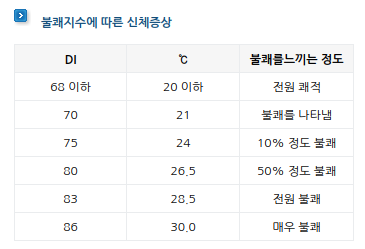
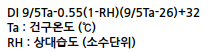\
DI = 1.8 * T - 0.55 * (1-H) * (1.8*T-26) +32 \
https://www.weatheri.co.kr/useful/useful04.php

In [52]:
df_weather.insert(13,column='classRainfall', value='NaN')
df_weather.insert(16,column='discomfortIndex', value='NaN')
# 1.8 * T - 0.55 * (1-H) * (1.8*T-26) +32

In [77]:
df_weather

,dateObs,dateObs_y,dateObs_m,dateObs_d,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hhmiTempMin_h,...,hhmiTempMax_m,classRainfall,hourRainfall,RainfallAmount,discomfortIndex,HumidAvg,SnowloadMax,hhmiSnowloadMax,hhmiSnowloadMax_h,hhmiSnowloadMax_m
0,2020-01-01,2020,1,1,-2.2,-6.5,00:01:00,0.3,14:57:00,0.0,...,57,약한비,9.83,0.1,전원쾌적,64.4,0.0,0.0,0.0,0.0
1,2020-01-02,2020,1,2,1.0,-0.7,00:01:00,3.8,15:00:00,0.0,...,0,무강수,0.00,0.0,전원쾌적,65.4,0.0,0.0,0.0,0.0
2,2020-01-03,2020,1,3,-0.1,-3.4,08:07:00,4.6,15:47:00,8.0,...,47,무강수,0.00,0.0,전원쾌적,56.9,0.0,0.0,0.0,0.0
3,2020-01-04,2020,1,4,1.2,-2.8,05:12:00,6.1,14:50:00,5.0,...,50,무강수,0.00,0.0,전원쾌적,50.8,0.0,0.0,0.0,0.0
4,2020-01-05,2020,1,5,1.3,-3.2,08:21:00,6.6,14:53:00,8.0,...,53,무강수,0.00,0.0,전원쾌적,45.6,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2023-04-26,2023,4,26,10.2,7.4,23:50:00,13.5,15:08:00,23.0,...,8,무강수,0.00,0.0,전원쾌적,69.9,0.0,0.0,0.0,0.0
1212,2023-04-27,2023,4,27,12.9,5.1,06:10:00,20.0,15:26:00,6.0,...,26,무강수,0.00,0.0,전원쾌적,61.6,0.0,0.0,0.0,0.0
1213,2023-04-28,2023,4,28,15.7,9.0,06:13:00,21.3,14:44:00,6.0,...,44,보통비,2.83,1.9,전원쾌적,62.0,0.0,0.0,0.0,0.0
1214,2023-04-29,2023,4,29,13.2,9.9,21:44:00,15.8,07:55:00,21.0,...,55,강한비,13.83,25.1,전원쾌적,88.1,0.0,0.0,0.0,0.0


In [55]:
condition_30 = (df_weather['RainfallAmount']>=30)
condition_10 = (df_weather['RainfallAmount']>=10) & (df_weather['RainfallAmount']<30)
condition_1 = (df_weather['RainfallAmount']>=1) & (df_weather['RainfallAmount']<10)
condition_0_1 = (df_weather['RainfallAmount']>=0.1) & (df_weather['RainfallAmount']<1)
condition_0 = (df_weather['RainfallAmount']<0.1)

df_weather.loc[condition_30,'classRainfall'] = "매우강한비"
df_weather.loc[condition_10,'classRainfall'] = "강한비"
df_weather.loc[condition_1,'classRainfall'] = "보통비"
df_weather.loc[condition_0_1,'classRainfall'] = "약한비"
df_weather.loc[condition_0,'classRainfall'] = "무강수"

In [75]:
# 1.8 * T - 0.55 * (1-H) * (1.8*T-26) +32

df_weather['discomfortIndex'] = (df_weather['TempAvg'] * 1.8) - (0.55 * (1-df_weather['HumidAvg']/100) * (1.8 * df_weather['TempAvg'] -26)) +32

In [76]:
condition_disvery = (df_weather['discomfortIndex']>83)
condition_disall = (df_weather['discomfortIndex']>80) & (df_weather['discomfortIndex']<=83)
condition_dis50 = (df_weather['discomfortIndex']>75) & (df_weather['discomfortIndex']<=80)
condition_dis10 = (df_weather['discomfortIndex']>70) & (df_weather['discomfortIndex']<=75)
condition_dis0 = (df_weather['discomfortIndex']>68) & (df_weather['discomfortIndex']<=70)
condition_com = (df_weather['discomfortIndex']<=68)

df_weather.loc[condition_disvery,'discomfortIndex'] = "매우불쾌"
df_weather.loc[condition_disall,'discomfortIndex'] = "전원불쾌"
df_weather.loc[condition_dis50,'discomfortIndex'] = "50%불쾌"
df_weather.loc[condition_dis10,'discomfortIndex'] = "10%불쾌"
df_weather.loc[condition_dis0,'discomfortIndex'] = "불쾌"
df_weather.loc[condition_com,'discomfortIndex'] = "전원쾌적"

In [78]:
df_weather.to_csv("../../cvs_data/data_result/weather_v3.csv", index=False)